In [24]:
import pandas as pd
import numpy as np

# Data preprocessing

In [102]:
ds=pd.read_csv('geyser.csv', skiprows=30, on_bad_lines='skip')
ds

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


## check entried with non-numeric data

In [104]:
# Check whether numeric in both eruption and waiting
ds['checkEruptions']=pd.to_numeric(ds['eruptions'], errors="coerce")
# np.where(ds['eruptions'].str.isnumeric(),1,0)
# ds['checkWaiting']=np.where(ds['waiting'].str.isnumeric(),1,0)
ds['checkWaiting']=pd.to_numeric(ds['waiting'], errors="coerce")

# get problematic entries
problem_rows=ds[ds['checkEruptions'].isna()].index.to_list()+ds[ds['checkWaiting'].isna()].index.to_list()
ds[ds.index.isin(problem_rows)]


,eruptions,waiting,checkEruptions,checkWaiting
20,1 800,51,NaN,51.0
57,l.667,64,NaN,64.0
64,1.817,6O,1.817,NaN


## remove non-numeric entries

In [106]:
ds_numeric=ds[~ds.index.isin(problem_rows)][['eruptions','waiting']]
ds_numeric

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


## read entries with extra variables

In [107]:
# skip the comments, read dataset
ds_extra=pd.read_csv('geyser.csv', skiprows=31, names=["eruptions", "waiting", "extra"])
# check instances with 3 variables
extra=ds_extra[~ds_extra['extra'].isnull()]

print(f'There are {ds.shape[0]} observations.')
print(f'{extra.shape[0]} of them have 3 variables. [Suspicious]')
extra

There are 272 observations.
2 of them have 3 variables. [Suspicious]


,eruptions,waiting,extra
175,3,333,68.0
211,4,500,83.0


## add back cleaned error entries

In [108]:
print('=============View non-numeric entries=============')
print(ds[ds.index.isin(problem_rows)])
print('\n=========View entries with extra vaiables=========')
print(extra)

=============View non-numeric entries=============
   eruptions waiting  checkEruptions  checkWaiting
20     1 800      51             NaN          51.0
57     l.667      64             NaN          64.0
64     1.817      6O           1.817           NaN

=========View entries with extra vaiables=========
    eruptions waiting  extra
175         3     333   68.0
211         4     500   83.0


In [112]:
error_cleaned=pd.DataFrame({'eruptions':[1.800, 1.667, 1.817, 3.333, 4.500], 'waiting':[51,64,60,68,83]})
# error_cleaned
ds_full=pd.concat([ds_numeric, error_cleaned])
ds_full['eruptions']=ds_full['eruptions'].astype('float')
ds_full['waiting']=ds_full['waiting'].astype('float')
ds_full

,eruptions,waiting
0,3.600,79.0
1,1.800,54.0
2,3.333,74.0
3,2.283,62.0
4,4.533,85.0
...,...,...
0,1.800,51.0
1,1.667,64.0
2,1.817,60.0
3,3.333,68.0


## check outliers

In [113]:
e_q1=ds_full['eruptions'].quantile(0.25)
e_q3=ds_full['eruptions'].quantile(0.75)
e_lowerbound=e_q1-1.5*(e_q3-e_q1)
e_upperbound=e_q3+1.5*(e_q3-e_q1)

w_q1=ds_full['waiting'].quantile(0.25)
w_q3=ds_full['waiting'].quantile(0.75)
w_lowerbound=w_q1-1.5*(w_q3-w_q1)
w_upperbound=w_q3+1.5*(w_q3-w_q1)

ds_full['outliers']=np.where((ds_full['eruptions']<e_lowerbound) | (ds_full['eruptions']>e_upperbound) | 
                             (ds_full['waiting']<w_lowerbound) | (ds_full['waiting']>w_upperbound) ,1,0)

print(e_lowerbound, e_upperbound)
print(w_lowerbound, w_upperbound)
ds_full


-1.351 7.951
22.0 118.0


,eruptions,waiting,outliers
0,3.600,79.0,0
1,1.800,54.0,0
2,3.333,74.0,0
3,2.283,62.0,0
4,4.533,85.0,0
...,...,...,...
0,1.800,51.0,0
1,1.667,64.0,0
2,1.817,60.0,0
3,3.333,68.0,0


In [114]:
ds_full[ds_full['outliers']==1]

,eruptions,waiting,outliers
116,2.317,5.0,1
230,41083.000,70.0,1
261,4500.000,84.0,1


## check orginal noting in dataset of defined outliers

In [116]:
ds_outliers=ds[ds.index.isin(ds_full[ds_full['outliers']==1].index)]
ds_outliers

,eruptions,waiting,checkEruptions,checkWaiting
116,2.317,05,2.317,5.0
230,41083,70,41083.000,70.0
261,4.5E3,84,4500.000,84.0


## exclude outliers, get final cleaned dataset

In [226]:
ds_clean=ds_full[~ds_full['eruptions'].index.isin(ds_outliers.index)][['eruptions','waiting']]
ds_clean

,eruptions,waiting
0,3.600,79.0
1,1.800,54.0
2,3.333,74.0
3,2.283,62.0
4,4.533,85.0
...,...,...
0,1.800,51.0
1,1.667,64.0
2,1.817,60.0
3,3.333,68.0


In [330]:
# summary
e_max=ds_clean['eruptions'].max()
e_min=ds_clean['eruptions'].min()
e_mean=ds_clean['eruptions'].mean()
e_std=ds_clean['eruptions'].std()
e_median=ds_clean['eruptions'].median()
e_q1=ds_clean['eruptions'].quantile(0.25)
e_q2=ds_clean['eruptions'].quantile(0.75)
print('Eruptions Max', e_max)
print('Eruptions Min', e_min)
print('Eruptions Avg', e_mean)
print('Eruptions Std', e_std)
print('Eruptions Median', e_median)
print('Eruptions Q1', e_q1)
print('Eruptions Q3', e_q3)

w_max=ds_clean['waiting'].max()
w_min=ds_clean['waiting'].min()
w_mean=ds_clean['waiting'].mean()
w_std=ds_clean['waiting'].std()
w_median=ds_clean['waiting'].median()
w_q1=ds_clean['waiting'].quantile(0.25)
w_q2=ds_clean['waiting'].quantile(0.75)
print('Waiting Max', w_max)
print('Waiting Min', w_min)
print('Waiting Avg', w_mean)
print('Waiting Std', w_std)
print('Waiting Median', w_median)
print('Waiting Q1', w_q1)
print('Waiting Q3', w_q3)

Eruptions Max 5.1
Eruptions Min 1.6
Eruptions Avg 3.4735940959409595
Eruptions Std 1.1480491461775877
Eruptions Median 4.0
Eruptions Q1 2.1165000000000003
Eruptions Q3 4.46275
Waiting Max 96.0
Waiting Min 43.0
Waiting Avg 70.79704797047971
Waiting Std 13.624030735265833
Waiting Median 76.0
Waiting Q1 58.0
Waiting Q3 82.0


# Data visualiazation

In [227]:
import matplotlib.pyplot as plt
import ptitprince as pt

x=ds_clean['eruptions']
y=ds_clean['waiting']

## distribution

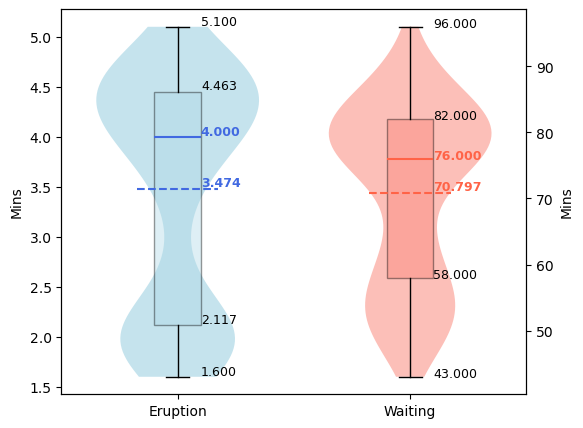

In [333]:
fig, ax1 = plt.subplots(figsize=(6,5))

# eruption

box1=ax1.boxplot(x, positions=[1], widths=0.2, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.4))
for median in box1['medians']:
    median.set(color="royalblue", linewidth=1.5)


eruption = ax1.violinplot(x, positions=[1], widths=0.7, showmeans=True, showmedians=False, showextrema=False)
eruption['cmeans'].set_color("royalblue")
eruption['cmeans'].set_linewidth(1.5)
eruption['cmeans'].set_linestyle("--")
    
ax1.set_ylabel("Mins")

for pc in eruption['bodies']:
    pc.set_facecolor('lightblue')
    # pc.set_edgecolor('black')
    pc.set_alpha(0.7)

ax1.text(1.1, e_median+0.05, f"{e_median:.3f}", va="center", fontsize=9, color="royalblue", fontweight='bold')
ax1.text(1.1, e_mean+0.07, f"{e_mean:.3f}", va="center", fontsize=9, color="royalblue", fontweight='bold')
ax1.text(1.1, e_q1+0.05, f"{e_q1:.3f}", va="center", fontsize=9, color="black")
ax1.text(1.1, e_q3+0.05, f"{e_q3:.3f}", va="center", fontsize=9, color="black")
ax1.text(1.1, e_max+0.05, f"{e_max:.3f}", va="center", fontsize=9, color="black")
ax1.text(1.1, e_min+0.05, f"{e_min:.3f}", va="center", fontsize=9, color="black")


# waiting
ax2 = ax1.twinx()

box2=ax2.boxplot(y, positions=[2], widths=0.2, patch_artist=True,
            boxprops=dict(facecolor='salmon', alpha=0.4))
for median in box2['medians']:
    median.set(color="tomato", linewidth=1.5)

waiting = ax2.violinplot(y, positions=[2], widths=0.7, showmeans=True, showmedians=False, showextrema=False)
waiting['cmeans'].set_color("tomato")
waiting['cmeans'].set_linewidth(1.5)
waiting['cmeans'].set_linestyle("--")
 
ax2.set_ylabel("Mins")

for pc in waiting['bodies']:
    pc.set_facecolor('salmon')
    # pc.set_edgecolor('black')
    pc.set_alpha(0.5)

ax2.text(2.1, w_median+0.5, f"{w_median:.3f}", va="center", fontsize=9, color="tomato", fontweight='bold')
ax2.text(2.1, w_mean+1, f"{w_mean:.3f}", va="center", fontsize=9, color="tomato", fontweight='bold')
ax2.text(2.1, w_q1+0.5, f"{w_q1:.3f}", va="center", fontsize=9, color="black")
ax2.text(2.1, w_q3+0.5, f"{w_q3:.3f}", va="center", fontsize=9, color="black")
ax2.text(2.1, w_max+0.5, f"{w_max:.3f}", va="center", fontsize=9, color="black")
ax2.text(2.1, w_min+0.5, f"{w_min:.3f}", va="center", fontsize=9, color="black")




ax1.set_xticks([1, 2])
ax1.set_xticklabels(["Eruption", "Waiting"])



plt.savefig('fig1.png', dpi=300)
plt.show()

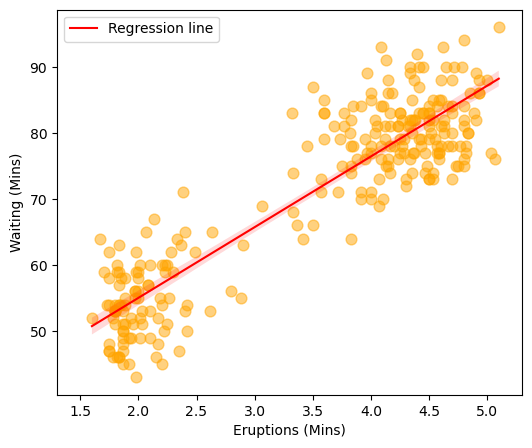

In [372]:

# plt.scatter(ds_clean['eruptions'],ds_clean['waiting'], c='r', s=20)

# coeffs = np.polyfit(ds_clean['eruptions'],ds_clean['waiting'], 1)
# trend = np.poly1d(coeffs)
# plt.plot(x, trend(x), color="red", label="Trend line")

plt.figure(figsize=(6, 5))
sns.regplot(ds_clean['eruptions'],ds_clean['waiting'], line_kws={"color": "red", "linewidth": 1.5,'label': 'Regression line'}, 
            scatter_kws={'color':'orange','alpha':0.5, 's':60})

plt.xlabel('Eruptions (Mins)')
plt.ylabel('Waiting (Mins)')

plt.xlim(1.3,5.3)

plt.legend()

plt.savefig('fig2.png',dpi=300)
plt.show()

In [ ]:
# bad plot

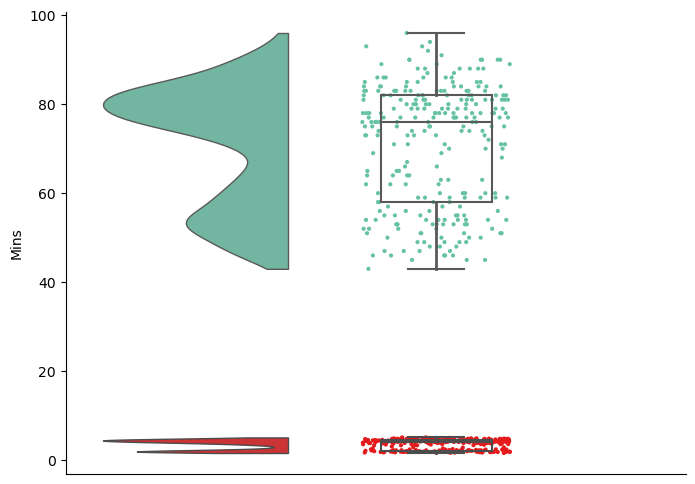

In [381]:
plt.figure(figsize=(8, 6))

# Raincloud for first variable on left y-axis
pt.RainCloud(y=ds_clean['eruptions'], width_viol=.5, palette="Set1",orient="v")
pt.RainCloud(y=ds_clean['waiting'], width_viol=.5, palette="Set2",orient="v")

plt.ylabel("Mins")
plt.xticks([])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
